# Intro & Import

This is an exploratory analysis and visualisation into data received from the DF Physiotherapists office. The data are of 300 body composition tests conducted by DF Physiotherapists in 2020 in St. Bricin’s Military Hospital, Dublin and DFTC.

The cohort consist of personnel attending DF Physiotherapy with injury, members of a HRF-A Course, Cadets and DF sports teams. The cohort is therefore not a random sample, but may be proposed to represent some of the fittest and least-fit of the Defence Forces.

The grouping is broken down by age category and sex.

In [1]:
# Some useful imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from collections import Counter
import numpy as np

In [2]:
import sys
!{sys.executable} -m pip install xlrd;
!{sys.executable} -m pip install seaborn;

As usual, import the data and have a peek.

In [3]:
df = pd.read_excel('BMI.xlsx')

# Remove the invalid rows & columns, and display
df = df.drop(["Column10", "Column11", "Column12", "Column13"], axis=1)
df = df.drop([300,301])
print(df)

    Number   BMI   BF%    VF     SMM  Weight   YOB     Sex   Age
0        1  23.3  11.6   3.0    Over  Normal  89.0    Male  31.0
1        2  26.7  16.7   6.0    Over  Normal  98.0    Male  22.0
2        3  29.5  26.8  14.0    Over    Over  65.0    Male  55.0
3        4  24.8  24.3   9.0    Over    Over  91.0  Female  29.0
4        5  26.2  27.2   7.0    Over    Over  99.0  Female  21.0
..     ...   ...   ...   ...     ...     ...   ...     ...   ...
295    296  31.7  35.5  15.0  Normal    Over  61.0    Male  59.0
296    297  34.8  40.7  19.0    Over    Over  66.0    Male  54.0
297    298  26.5  21.7   6.0    Over    Over  94.0    Male  26.0
298    299  26.3  18.5   6.0    Over    Over  99.0    Male  21.0
299    300  30.3  21.5   8.0    Over    Over  96.0    Male  24.0

[300 rows x 9 columns]


In [4]:
# Subset the dataframe
dfsub = df[["BMI","BF%","VF","SMM","Weight","Sex","Age"]]
print(dfsub)

      BMI   BF%    VF     SMM  Weight     Sex   Age
0    23.3  11.6   3.0    Over  Normal    Male  31.0
1    26.7  16.7   6.0    Over  Normal    Male  22.0
2    29.5  26.8  14.0    Over    Over    Male  55.0
3    24.8  24.3   9.0    Over    Over  Female  29.0
4    26.2  27.2   7.0    Over    Over  Female  21.0
..    ...   ...   ...     ...     ...     ...   ...
295  31.7  35.5  15.0  Normal    Over    Male  59.0
296  34.8  40.7  19.0    Over    Over    Male  54.0
297  26.5  21.7   6.0    Over    Over    Male  26.0
298  26.3  18.5   6.0    Over    Over    Male  21.0
299  30.3  21.5   8.0    Over    Over    Male  24.0

[300 rows x 7 columns]


In [5]:
# Lets have a quick look at the summary
dfsub.describe(include='all')

,BMI,BF%,VF,SMM,Weight,Sex,Age
count,300.000000,300.000000,300.000000,300,300,300,300.000000
unique,NaN,NaN,NaN,3,3,2,NaN
top,NaN,NaN,NaN,Over,Over,Male,NaN
freq,NaN,NaN,NaN,209,196,268,NaN
mean,27.186333,22.197000,8.216667,NaN,NaN,NaN,34.113333
std,4.166033,8.745909,4.930594,NaN,NaN,NaN,11.400309
min,18.100000,7.000000,1.000000,NaN,NaN,NaN,19.000000
25%,24.600000,14.775000,4.000000,NaN,NaN,NaN,24.750000
50%,26.450000,21.150000,7.000000,NaN,NaN,NaN,32.000000
75%,29.200000,27.525000,11.000000,NaN,NaN,NaN,40.000000


In [6]:
# So what are the unique categorical values?
x = [dfsub.SMM.unique(),dfsub.Weight.unique()]
print("SMM unique values are:", x[0], "\nWeight unique values are:", x[1])

SMM unique values are: ['Over' 'Normal' 'Under'] 
Weight unique values are: ['Normal' 'Over' 'Under']


# Basic Visualisation

We can gain a good appreciation of the data by just applying a few simple visualisations. First, lets look at the density distribution of the continuous variables (BMI, BF and VF) to see how measurements are distributed in the data.

<AxesSubplot:xlabel='VF', ylabel='Density'>

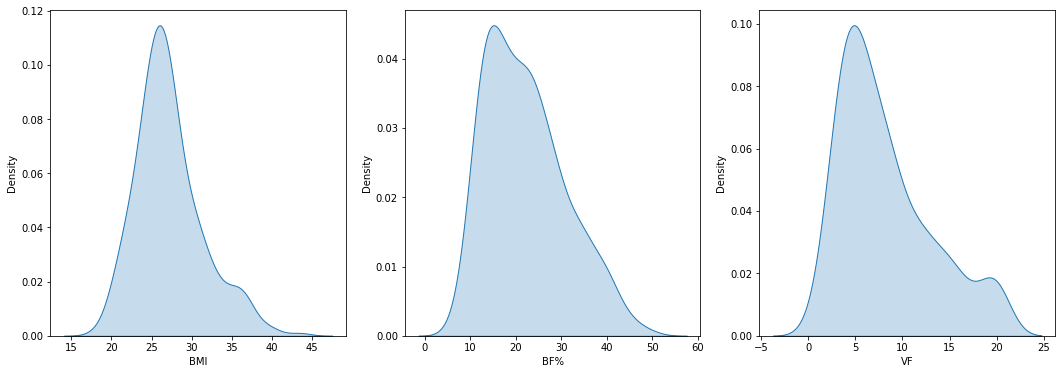

In [7]:
fig, axes = plt.subplots(1,3,figsize=(18,6))
sns.kdeplot(df['BMI'], shade=True, ax = axes[0])
sns.kdeplot(df['BF%'], shade=True, ax = axes[1])
sns.kdeplot(df['VF'], shade=True, ax = axes[2])

We can immediately see that VF and BF are of a very similar shape, as we might expect. Now lets look at some scatterplots to see correlations.

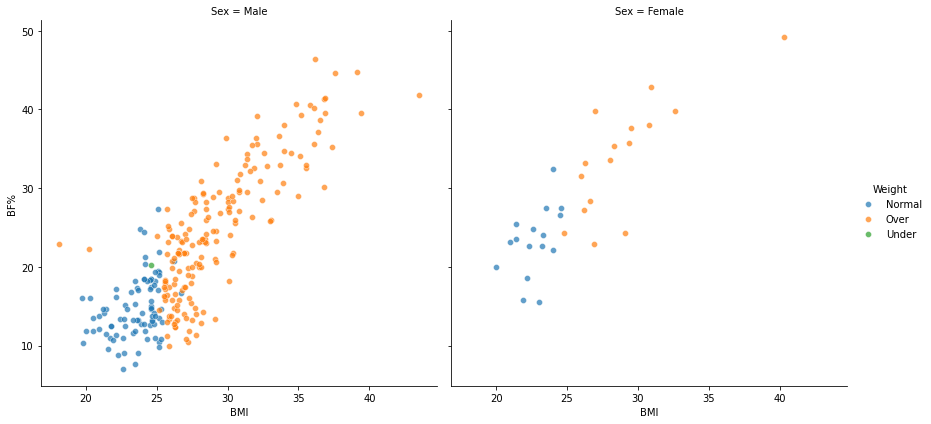

In [8]:
g = sns.FacetGrid(dfsub, col="Sex", hue="Weight",height = 6)
g.map(sns.scatterplot, "BMI", "BF%", alpha=.7)
g.add_legend()

Nothing too insightful here, BMI is of course strongly correlated with body fat. But in the Male plot, there are two unusual datapoints: BF% of about 23%, BMI between 18-20 and classified as overweight. We should try to find these datapoints, and decide if they are simply outliers, or errors.

In [9]:
# Start by subsetting for all the overweight 
dfsub[dfsub.Weight == 'Over']

,BMI,BF%,VF,SMM,Weight,Sex,Age
2,29.5,26.8,14.0,Over,Over,Male,55.0
3,24.8,24.3,9.0,Over,Over,Female,29.0
4,26.2,27.2,7.0,Over,Over,Female,21.0
5,28.5,27.4,11.0,Over,Over,Male,46.0
7,35.2,39.3,19.0,Over,Over,Male,32.0
...,...,...,...,...,...,...,...
295,31.7,35.5,15.0,Normal,Over,Male,59.0
296,34.8,40.7,19.0,Over,Over,Male,54.0
297,26.5,21.7,6.0,Over,Over,Male,26.0
298,26.3,18.5,6.0,Over,Over,Male,21.0


So there are 196 out of 300 people classed as overweight. We need to be much more specific. Lets limit the search to Males and less than 22 BMI.

In [10]:
dfsub[(dfsub.Weight == 'Over') & (dfsub.Sex == 'Male') & (dfsub.BMI <= 22)]

,BMI,BF%,VF,SMM,Weight,Sex,Age
232,18.1,22.9,8.0,Normal,Over,Male,35.0
251,20.2,22.3,8.0,Over,Over,Male,28.0


In the case of #251, its possibly due to high SMM. Not sure about #232 though. Ok, lets continue with exploring the data. 

Lets can plot VF vs BF and confirm what we would expect to see - a strong positive correlation.

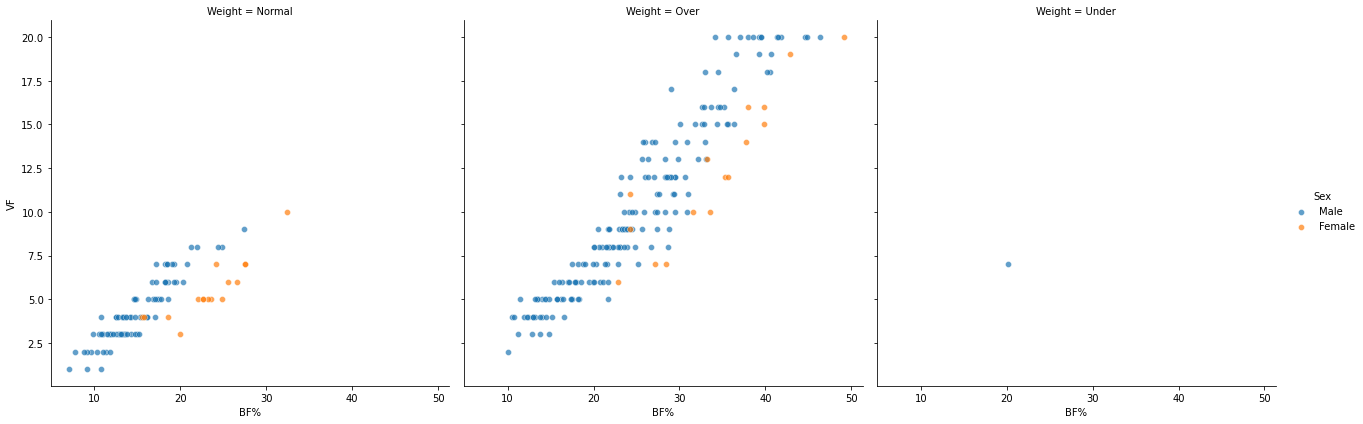

In [11]:
j = sns.FacetGrid(dfsub, col="Weight", hue="Sex",height = 6)
j.map(sns.scatterplot, "BF%", "VF", alpha=.7)
j.add_legend()

Again, exactly as one would expect: VF is strongly correlated with BF%. No surprises. Lets look at the correlations in general and see if there is anything surprising. For this, we can use a Pair Grid:

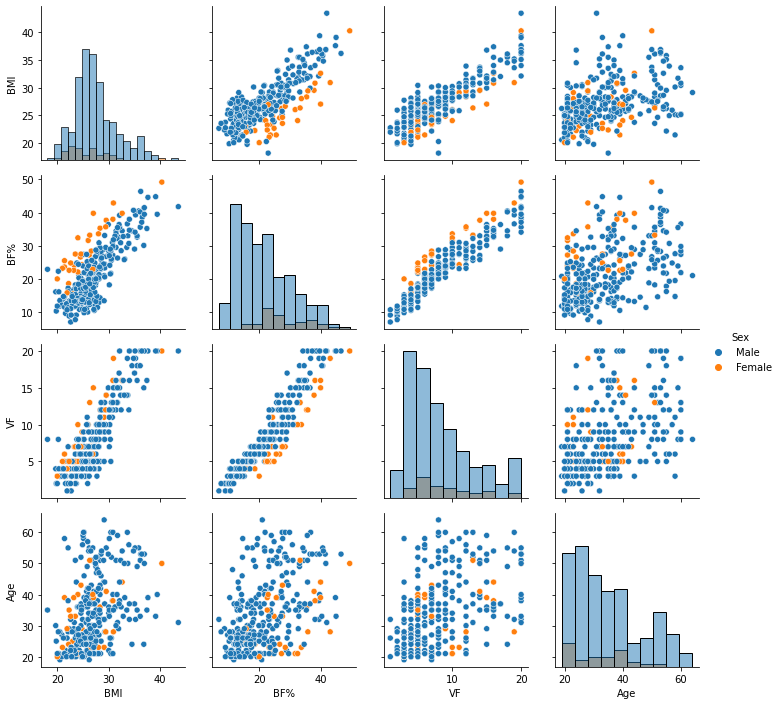

In [12]:
g = sns.PairGrid(dfsub, hue="Sex")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

It seems that the Age is probably not strongly correlated with BMI, BF or VF. If this was of any interest, we could dive into the numbers on that and put some measures on it.

# Report

In this section we'll visualise the report's findings. First, we can look at some boxplots to show the medians for Male vs Female. The box represents the middle 50% of the sample, with the thick black line within it representing the mean. This image is a good explanation:

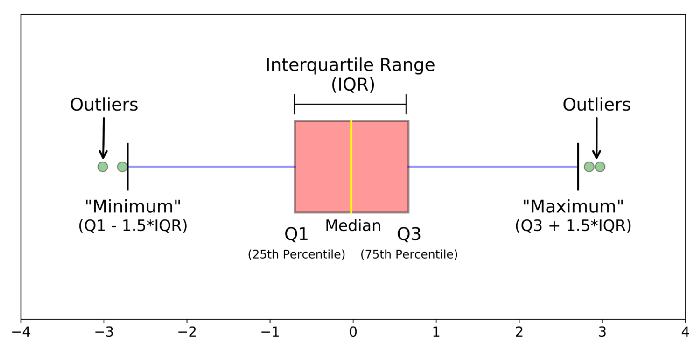

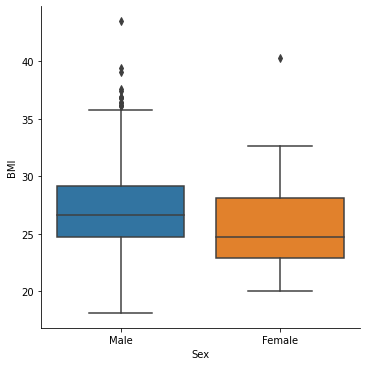

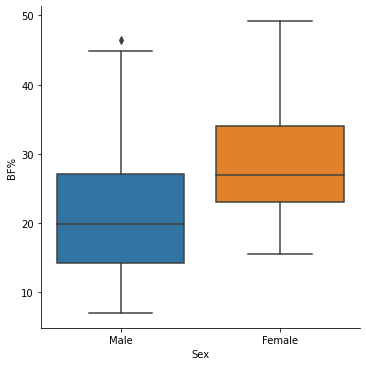

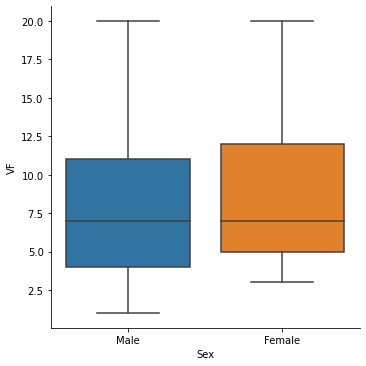

In [13]:
sns.catplot(x="Sex", y="BMI",kind="box", dodge=False, data=dfsub)
sns.catplot(x="Sex", y="BF%",kind="box", dodge=False, data=dfsub)
sns.catplot(x="Sex", y="VF",kind="box", dodge=False, data=dfsub)

Note the presence of a fair few outliers in the Male category for BMI, on the upper end. Now lets plot the basics, with the defined ranges drawn.

### Basic Histograms

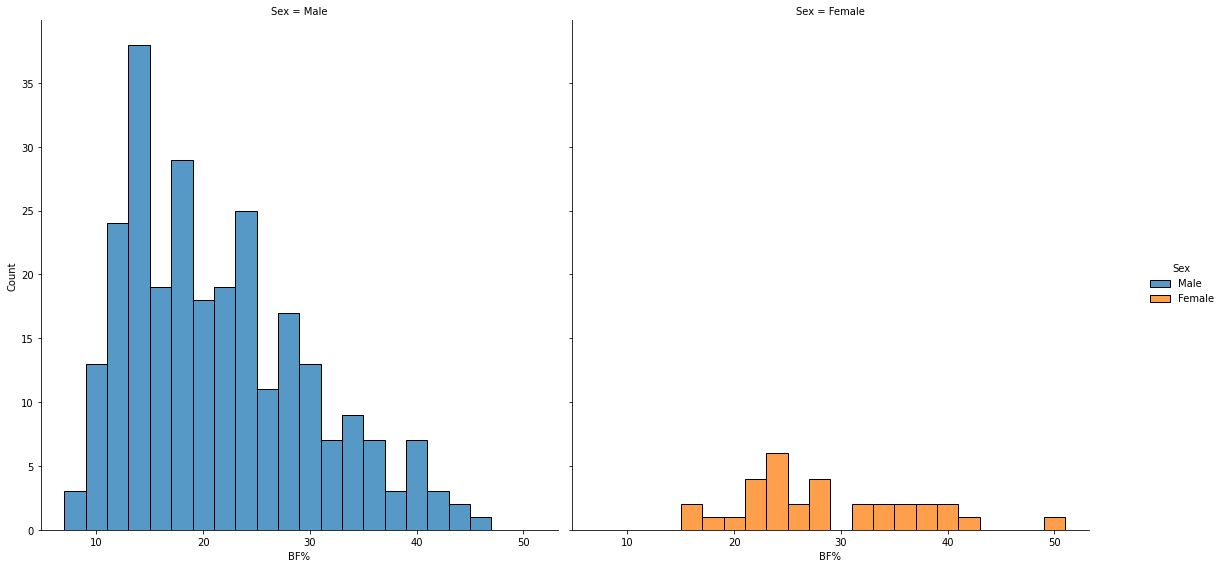

In [14]:
sns.displot(
    dfsub, x="BF%", col="Sex", hue = "Sex",
    binwidth=2, height=8, facet_kws=dict(margin_titles=True)
)
#plt.axvline(10, 0,1)

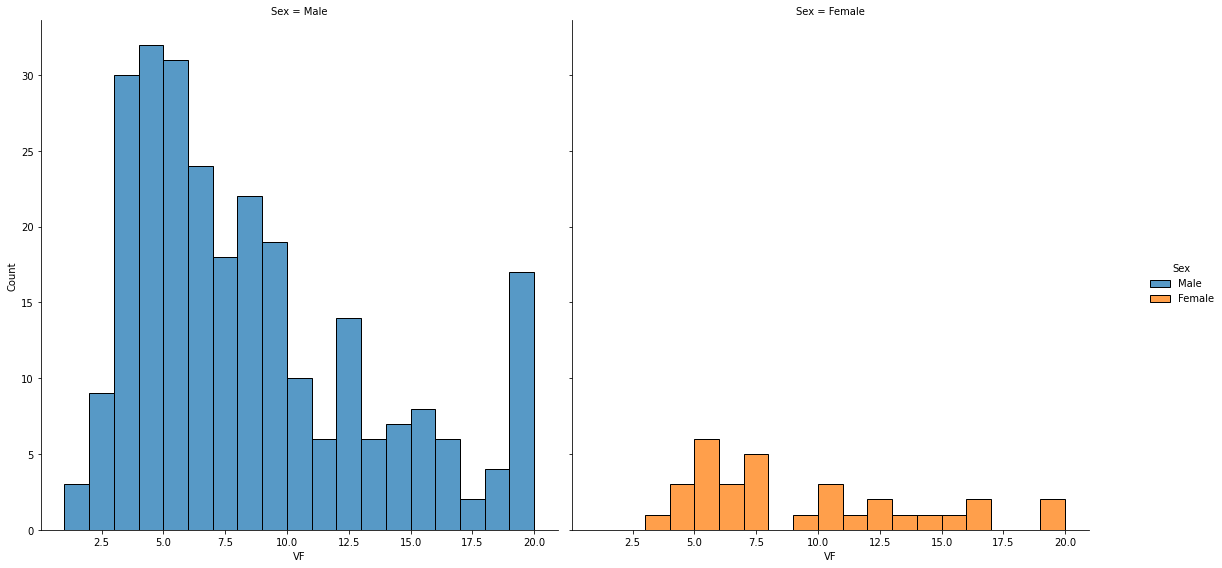

In [15]:
sns.displot(
    dfsub, x="VF", col="Sex", hue = "Sex",
    binwidth=1, height=8, facet_kws=dict(margin_titles=True)
)

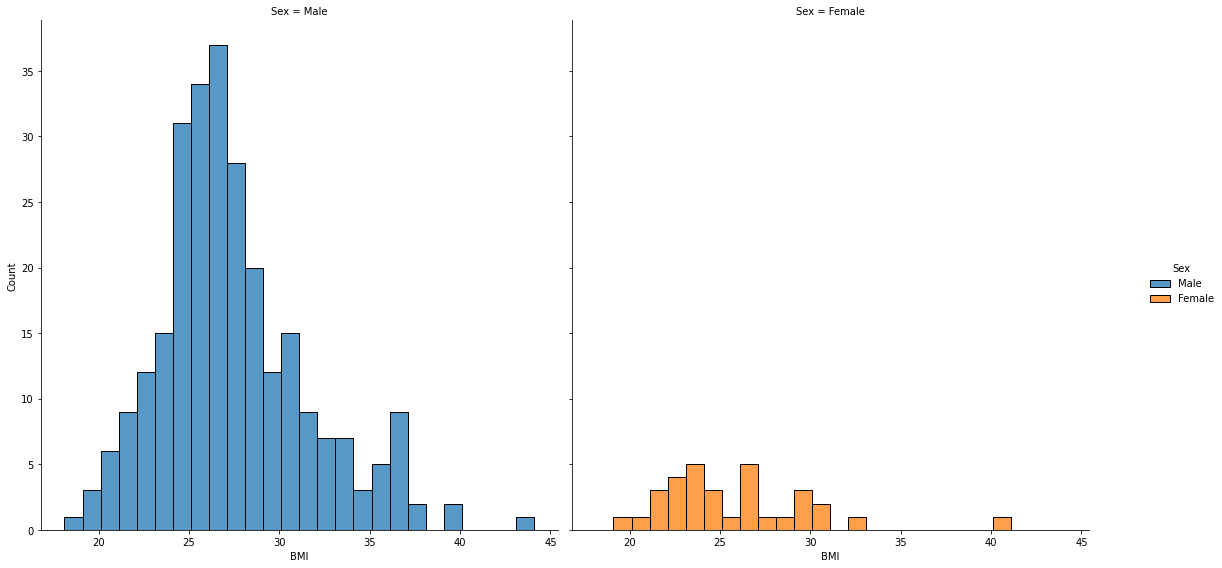

In [16]:
sns.displot(
    dfsub, x="BMI", col="Sex", hue = "Sex",
    binwidth=1, height=8, facet_kws=dict(margin_titles=True)
)

Text(32, 42, 'Female Obesity (33%)')

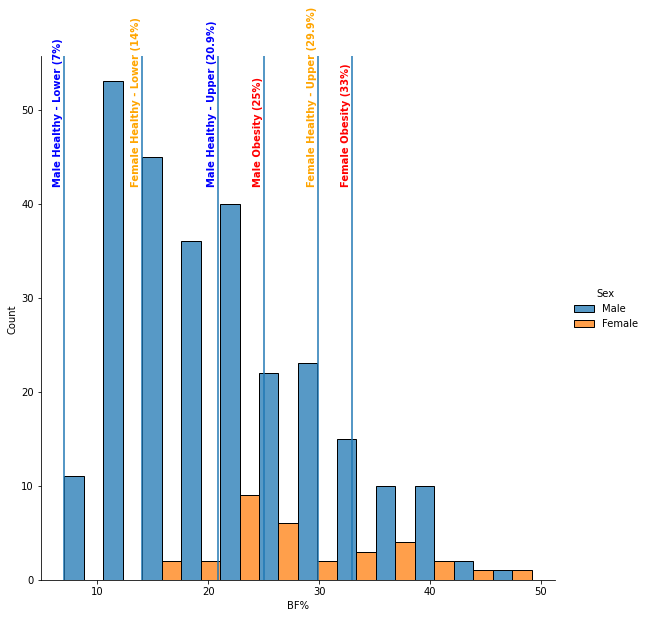

In [16]:
sns.displot(dfsub, x="BF%", hue="Sex",multiple='dodge',height = 8)

# Male Boundaries
plt.axvline(7, 0, 50)
plt.axvline(20.9,0,50)
plt.axvline(25,0,50)

# Female Boundaries
plt.axvline(14, 0, 50)
plt.axvline(29.9, 0, 50)
plt.axvline(33,0,50)


plt.text(6, 42, "Male Healthy - Lower (7%)", horizontalalignment='left', size='medium', color='blue', weight='semibold', rotation = 90)
plt.text(19.9, 42, "Male Healthy - Upper (20.9%)", horizontalalignment='left', size='medium', color='blue', weight='semibold', rotation = 90)
plt.text(13, 42, "Female Healthy - Lower (14%)", horizontalalignment='left', size='medium', color='orange', weight='semibold', rotation = 90)
plt.text(28.9, 42, "Female Healthy - Upper (29.9%)", horizontalalignment='left', size='medium', color='orange', weight='semibold', rotation = 90)
plt.text(24, 42, "Male Obesity (25%)", horizontalalignment='left', size='medium', color='red', weight='semibold', rotation = 90)
plt.text(32, 42, "Female Obesity (33%)", horizontalalignment='left', size='medium', color='red', weight='semibold', rotation = 90)


Text(7.5, 42, 'Upper limit of healthy VF (8%)')

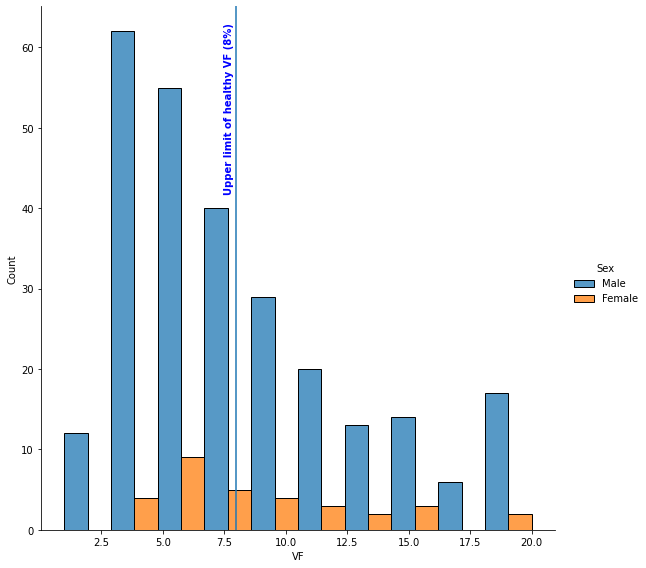

In [17]:
sns.displot(dfsub, x="VF", hue="Sex",multiple='dodge',height = 8)

# Boundaries
plt.axvline(8, 0, 50)

plt.text(7.5, 42, "Upper limit of healthy VF (8%)", horizontalalignment='left', size='medium', color='blue', weight='semibold', rotation = 90)

### Age Groups

Lets break down the age groups and plot the findings of the report.

In [18]:
# We can add a column of 'age bins'
dfsub_ages = dfsub
dfsub_ages['age_bins'] = pd.cut(x=dfsub['Age'], bins=[18, 24, 29, 34, 39, 44, 49, 54, 59, max(dfsub.Age)])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# Check it
dfsub_ages

,BMI,BF%,VF,SMM,Weight,Sex,Age,age_bins
0,23.3,11.6,3.0,Over,Normal,Male,31.0,"(29.0, 34.0]"
1,26.7,16.7,6.0,Over,Normal,Male,22.0,"(18.0, 24.0]"
2,29.5,26.8,14.0,Over,Over,Male,55.0,"(54.0, 59.0]"
3,24.8,24.3,9.0,Over,Over,Female,29.0,"(24.0, 29.0]"
4,26.2,27.2,7.0,Over,Over,Female,21.0,"(18.0, 24.0]"
...,...,...,...,...,...,...,...,...
295,31.7,35.5,15.0,Normal,Over,Male,59.0,"(54.0, 59.0]"
296,34.8,40.7,19.0,Over,Over,Male,54.0,"(49.0, 54.0]"
297,26.5,21.7,6.0,Over,Over,Male,26.0,"(24.0, 29.0]"
298,26.3,18.5,6.0,Over,Over,Male,21.0,"(18.0, 24.0]"


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


TypeError: unsupported operand type(s) for -: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

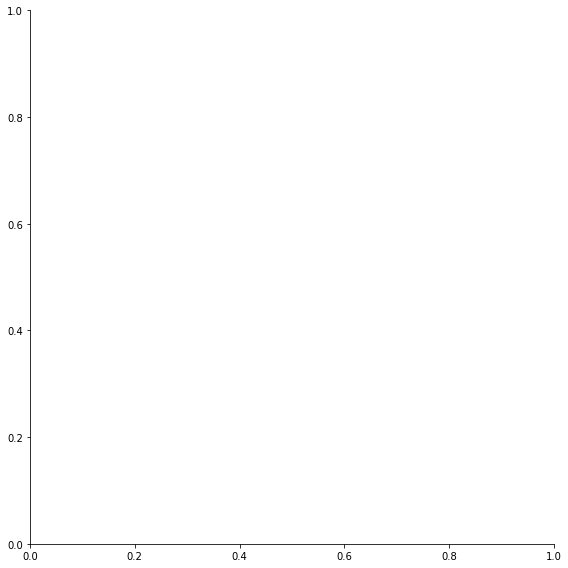

In [20]:
# Histograms
dfsub_ages['age_bins'] = dfsub_ages['age_bins'].astype(object)
sns.displot(dfsub_ages, x="age_bins", hue="Sex",multiple='dodge',height = 8)

In [21]:
dfsub_ages['age_bins'] = dfsub_ages['age_bins'].astype(object)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Bonus Visualisation

Just a few extra graphs for fun.

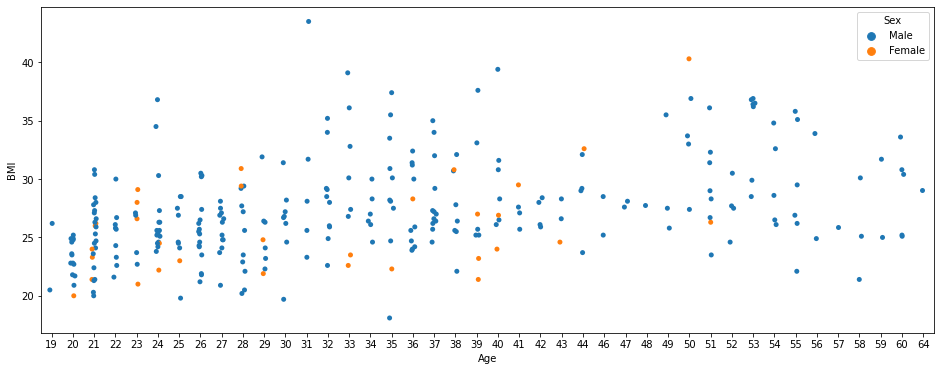

In [22]:
# Scatterplot
plt.figure(figsize = (16,6))
# Convert ages to integers
x = dfsub.Age.astype(int)
g = sns.stripplot(x = x, y = 'BMI', data = dfsub, hue = 'Sex')

Now lets try to do the same plot but with median lines drawn on, for both male and female.

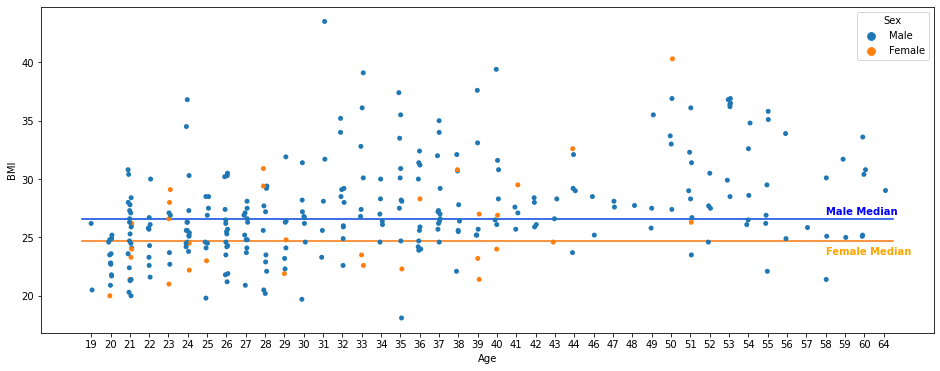

In [23]:
# calc medians
male_med = dfsub.loc[dfsub["Sex"] == 'Male'].median()['BMI']
female_med = dfsub.loc[dfsub["Sex"] == 'Female'].median()['BMI']

plt.figure(figsize = (16,6))
sns.stripplot(x = x, y = 'BMI', data = dfsub, hue = 'Sex')

z = plt.gca().axes.get_xlim()

# Calculate and plot the median
plt.plot(z, len(z) * [male_med], sns.xkcd_rgb["blue"])
plt.plot(z, len(z) * [female_med], sns.xkcd_rgb["orange"])
plt.text(38, 27, "Male Median", horizontalalignment='left', size='medium', color='blue', weight='semibold')
plt.text(38, 23.5, "Female Median", horizontalalignment='left', size='medium', color='orange', weight='semibold')
plt.show()

We could do exaclty this but with the mean, if that is of more interest.

In [24]:
# calc means
male_mean = dfsub.loc[dfsub["Sex"] == 'Male'].mean()['BMI']
female_mean = dfsub.loc[dfsub["Sex"] == 'Female'].mean()['BMI']

plt.figure(figsize = (16,6))
sns.stripplot(x = x, y = 'BMI', data = dfsub, hue = 'Sex')

z = plt.gca().axes.get_xlim()

# Calculate and plot the median
plt.plot(z, len(z) * [male_mean], sns.xkcd_rgb["blue"])
plt.plot(z, len(z) * [female_mean], sns.xkcd_rgb["orange"])
plt.text(38, 27.8, "Male Mean", horizontalalignment='left', size='medium', color='blue', weight='semibold')
plt.text(38, 26.2, "Female Mean", horizontalalignment='left', size='medium', color='orange', weight='semibold')
plt.show()

SystemError: <built-in function _abc_instancecheck> returned a result with an error set

Usually, we could run a regression on this type of data, but given that it is not a random sample, interpretation would be difficult and perhaps not very meaningful. Lets do the same as above for BF% (VF would be very similar).

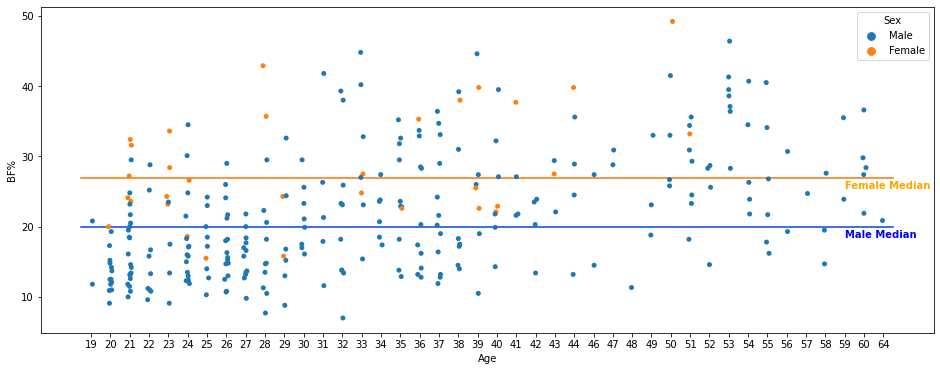

In [25]:
# BF% vs Age with Medians
# calc medians
male_med = dfsub.loc[dfsub["Sex"] == 'Male'].median()['BF%']
female_med = dfsub.loc[dfsub["Sex"] == 'Female'].median()['BF%']

plt.figure(figsize = (16,6))
sns.stripplot(x = x, y = 'BF%', data = dfsub, hue = 'Sex')

z = plt.gca().axes.get_xlim()

# Calculate and plot the median
plt.plot(z, len(z) * [male_med], sns.xkcd_rgb["blue"])
plt.plot(z, len(z) * [female_med], sns.xkcd_rgb["orange"])
plt.text(39, 18.5, "Male Median", horizontalalignment='left', size='medium', color='blue', weight='semibold')
plt.text(39, 25.5, "Female Median", horizontalalignment='left', size='medium', color='orange', weight='semibold')
plt.show()

Another type of interesting graph is a cumulative distribution graph. It lets us read off the proportion of people in the sample below a certain value of BF%, BMI or any other variable we're interested in. For example:

<AxesSubplot:xlabel='BMI', ylabel='Proportion'>

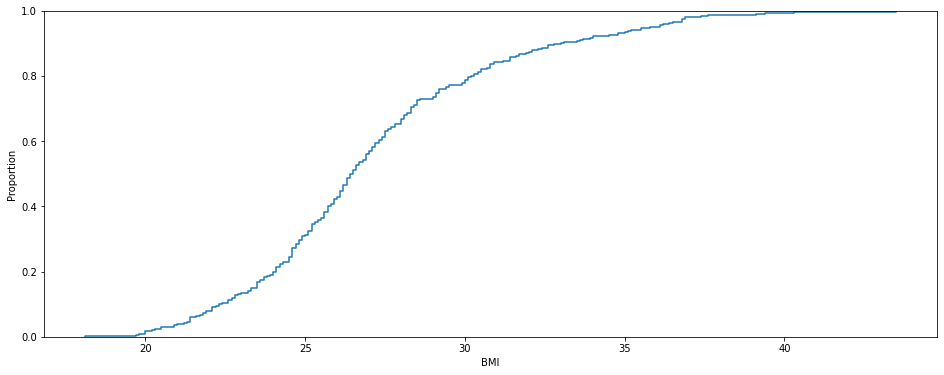

In [26]:
plt.figure(figsize = (16,6))
sns.ecdfplot(data=dfsub, x="BMI")

The way to read this type of graph is to say that approx 0.2 (or 20%) of the sample have a BMI <= 25, or 80% have a BMI <= 30. Simply draw a line from either axis to the curve, then read off the correpsonding value from the other axis. The key is the <= . So 100% of the sample have <= a BMI of 40. Similary for the other measures:

<AxesSubplot:xlabel='BF%', ylabel='Proportion'>

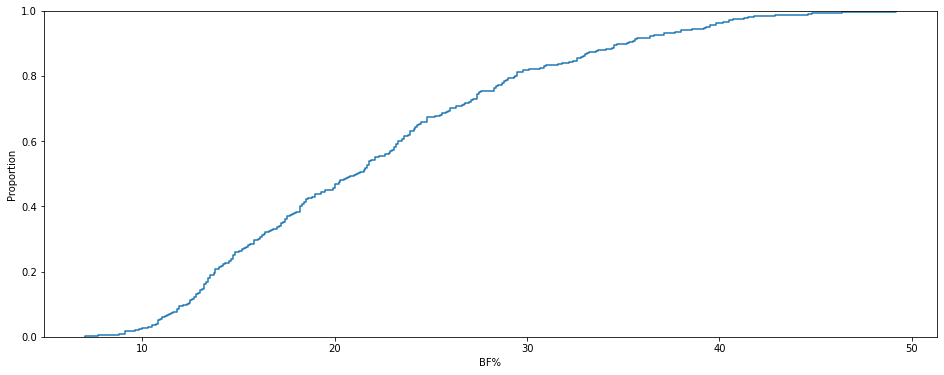

In [27]:
plt.figure(figsize = (16,6))
sns.ecdfplot(data=dfsub, x="BF%")

This is a much more linear cunulative distribution. Same method applies, where for example approx 45% of the sample have a BF of <= 20%.

<AxesSubplot:xlabel='VF', ylabel='Proportion'>

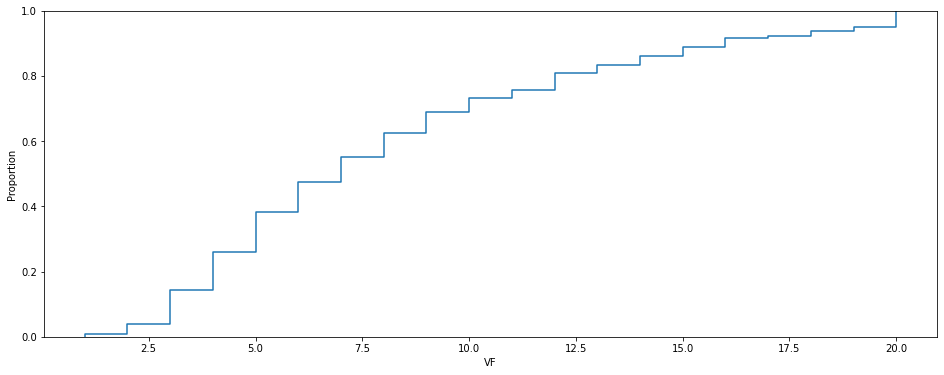

In [28]:
plt.figure(figsize = (16,6))
sns.ecdfplot(data=dfsub, x="VF")

The reason for the 'step' appearance is because the measurements were less granular, almost discrete to an extent. For example again, almost 60% of the sample have a VF measurement of <= 8% approximately.

With all of the above, if they were of interest, accurate statistics can be attained if desired.

### Skeletal Muscle Mass (SMM)


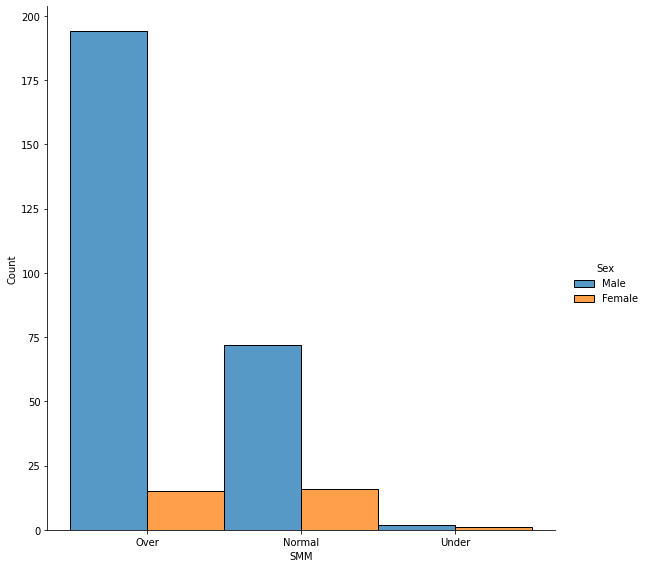

In [29]:
sns.displot(dfsub, x="SMM", hue="Sex",multiple='dodge',height = 8)

In [27]:
a = []
for i in ['Male','Female']:
    for j in ['Over','Normal','Under']:
        dfsub_temp = dfsub[(dfsub.SMM == j) & (dfsub.Sex == i)]
        x = (len(dfsub_temp.index)/len(dfsub.index)) * 100
        a.append(round(x,1))
print(a) # Test it out

[64.7, 24.0, 0.7, 5.0, 5.3, 0.3]


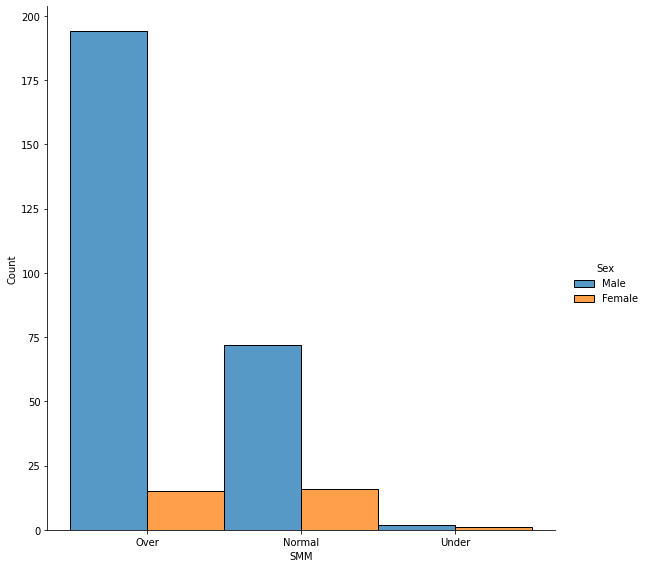

In [32]:
p1 = sns.displot(dfsub, x="SMM", hue="Sex",multiple='dodge',height = 8)
#p1.text(3+0.2, 4.5, str(a[0]), horizontalalignment='left', size='medium', color='black', weight='semibold')

In [31]:
# Try to plot the precentages over the bars of the histogram

# Get the values first
male_counter = Counter(dfsub[(dfsub.Sex == 'Male')].SMM).values()
mc = list(male_counter)
female_counter = Counter(dfsub[(dfsub.Sex == 'Female')].SMM).values()
fc = list(female_counter)

# Merge
#pcntgs = np.array([mc + fc])
pcntgs = mc + fc

myorder = [0, 3, 1, 5, 2, 4]
pcntgs = [pcntgs[i] for i in myorder]
print(pcntgs)

[194, 15, 72, 16, 2, 1]
